# Numerical Differentiation and Integration

Based on Chapter 5 of Landau's text

## Problem 1: Numerical derivatives

### First order derivatives (5.1 - 5.5)
In this exercise we consider the following numerical schemes for first order derivatives:
$$\begin{aligned}
\text{Forward Difference (FD)}:&\qquad D^\text{fd}_{h} f(x) := \frac{f(x+h) - f(x)}{h},\\
\text{Central Difference (CD)}:&\qquad D^\text{cd}_{h} f(x)  := \frac{f(x+h) - f(x-h)}{2h}.
\end{aligned}
$$
The subscript $h$ denotes that the operator depends on the grid resolution you choose.

1. Write functions that compute forward and central difference derivatives. To test your implementation compute the derivative of $f(x)=\sin(x)$ and plot the true derivative $f'(x)=\cos(x)$ together with your computed derivative.

 *Note:* You may compute the derivative at a few single locations or on a small interval, say, $[-\pi, \pi]$

1. For a fixed $x$-value, compute the errors as a function of $h$ for both the FD and CD schemes. Make a loglog plot of the results.

1. Find the order of accuray with respect to grid resolution by comparing the slopes of the loglog plots against the curves $y=h^p$ where $p$ is the order.

1. When you take a large enough range of $h$ values, you can identify two regions where the error depends differently on the grid resolution. 
 - Explain the two regimes, and
 - Find the optimum value of $h$. Does it agree with the theory in the book?


#### Extrapolation method
An often applied trick to accelerate convergence by increasing the order of accuracy is to use extrapolation methods. The following example is given in the book. It uses the values of the CD scheme for two different grid resolutions to calculate the derivative more accurately:
$$ 
\text{Extrapolated Central Difference (ED)}:\qquad D^\text{ed}_{h} f(x) := \frac{4 D^\text{cd}_{h/2} f(x) - D^\text{cd}_{h} f(x)}{3}. $$

1. Write a function for the ED scheme. 
 *Hint:* You can call the function for the CD scheme within this function!
1. Determine the order of accuracy and the optimum value for $h$ by plotting the error versus grid resolution for this method.
1. How much accuracy was gained by extrapolation? Comment also on the trade-off between accuracy and computational cost.

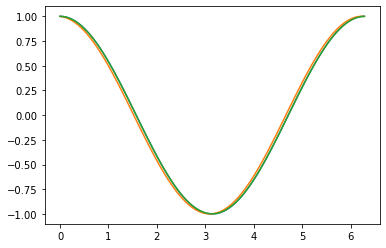

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def FD(f, x, h):
    return (f(x+h)-f(x))/h
def CD(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)
def ECD(f, x, h):
    return (4*CD(f, x, h/2) - CD(f, x, h))/3

x = np.linspace(0,2*np.pi,100)

fig1 = plt.figure()
plt.plot(x, np.cos(x))
plt.plot(x, FD(np.sin, x, 0.1))
plt.plot(x, CD(np.sin, x, 0.1))
plt.show()

x1 = 1
h = 10.**np.arange(2,-14,-.05)

fig2, ax = plt.subplots(dpi=100)
ax.loglog(h, abs(FD(np.sin, x1, h)-np.cos(x1)), color='C0')
ax.loglog(h, abs(CD(np.sin, x1, h)-np.cos(x1)), color='C1')
ax.loglog(h, abs(ECD(np.sin, x1, h)-np.cos(x1)), color='C2')

ax.loglog(h, h, color='C0', linestyle=':')
ax.loglog(h, h**2, color='C1', linestyle=':')
ax.loglog(h, h**4, color='C2', linestyle=':')
plt.show()



### Second order derivatives (5.6)
The second order derivatives can be found through
$$ \begin{aligned}
D^{2}_{h} f(x) :&= \frac{D^\text{fd}_{h} f(x) - D^\text{fd}_{h} f(x-h)}{h},\qquad&(1) \\
&= \frac{f(x+h) - 2f(x) + f(x-h)}{h^2}.\qquad&(2)
\end{aligned}$$
Note that (1) is just a forward difference applied to a forward difference (albeit slightly in disguised form)!

1. For both (1) and (2), compute the second derivative of $\sin(x)$. Make plots to verify your implementation.
1. Calculate and plot the errors as a function of $h$, just as you did before. Can you determine the order of accuracy with respect to $h$? What is the optimal value for $h$?
1. Is there any difference between the two implementations? Why could you expect a difference?

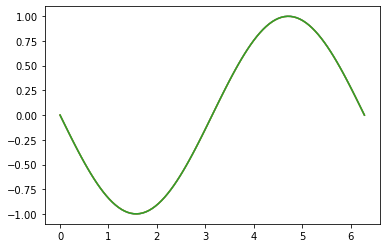

In [38]:
def D2_FD(f, x, h):
    return (FD(f, x, h) - FD(f, x - h, h))/h
def D2(f, x, h):
    return (f(x+h)-2*f(x)+f(x-h))/h**2

x = np.linspace(0,2*np.pi,100)

fig1 = plt.figure()
plt.plot(x, -np.sin(x))
plt.plot(x, D2_FD(np.sin, x, 0.1))
plt.plot(x, D2(np.sin, x, 0.1))
plt.show()

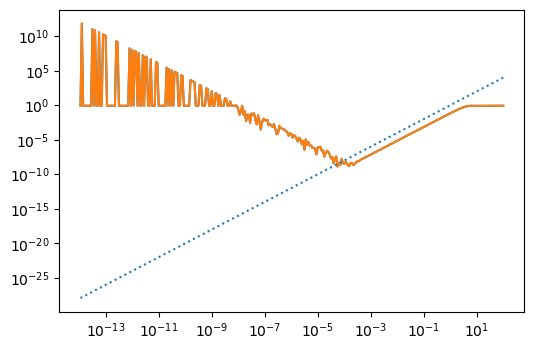

In [41]:
x1 = 1
h = 10.**np.arange(2,-14,-.05)

fig2, ax = plt.subplots(dpi=100)
ax.loglog(h, abs(D2_FD(np.sin, x1, h)+np.sin(x1)), color='C0')
ax.loglog(h, abs(D2(np.sin, x1, h)+np.sin(x1)), color='C1')

ax.loglog(h, h**2, color='C0', linestyle=':')
plt.show()

## Problem 2: Numerical integration (5.12.3)
Read about the three integration methods: Trapezoid, Simpson, and Gaussian quadrature in sections 5.7-5.12 to refresh your knowledge about numerical integration.

### Brief summary of numerical integration

1. The numerical integral of a function $f(x)$ is approximated as the equivalent of a finite sum over boxes of height $f(x)$ and width $w_{i}$:$$
\int_{a}^{b}f(x)dx\approx\sum_{i=1}^{N}f(x_{i})w_{i} 
$$Different numerical integration methods choose different values for $x_{i}$ and $w_{i}$.


2. Trapezoid and Simpson integration rules use evenly spaced values of $x$. They use $N$ points $x_{i}$ evenly spaced at a distance $h$ apart throughout the integration region $[a, b]$ and include the endpoints in the integration region. This means that there are $(N − 1)$ intervals of length $h$ (**Note: N should be an odd number in Simpson rule**):

$$
h=\frac{b-a}{N-1}, \;\;\;\;\;\;\;\;
x_{i}=a+(i-1)h, \;\;\;\;\;\;\;\;
i=1,2,..,N
$$

3. The $w_{i}$ in Trapezoid, and Simpson (degree 3) are as follows (see the derivations of the equations 5.33 and 5.42 in the book):$$\mbox{Trapezoid}: \;\;\;\;\;\;\;\: w_{i}=\{\frac{h}{2},h,...,h,\frac{h}{2}\}$$


$$
\mbox{Simpson}: \;\;\;\;\;\;\;\: w_{i}=\{\frac{h}{3},\frac{4h}{3},\frac{2h}{3},\frac{4h}{3},...,\frac{4h}{3},\frac{h}{3}\}
$$

4. In Gaussian quadrature the values of points and weights change as the number of points $N$ changes, and the points are not spaced equally. Programs to generate these points and weights are standard in mathematical function libraries. See for example four-point set given in table 5.3 of the book. For different values of $N$ Check out this [online library](https://pomax.github.io/bezierinfo/legendre-gauss.html). Note that the values in mathematical libraries are provided for the integration interval $[-1,1]$ and must be mapped into the $x$ interval $[a,b]$. See equations 5.58-5.63 for several mapping examples. 









### Exercise

1. Complete the given programs to find the integral of $e^{-t}$ in $[0,1]$ using the trapezoid and Simpson algorithms. There is an analytic answer with which to compare: $$\int_{0}^{1} e^{-t} dt = 1-e^{-1}$$.

2. Compute the error $E=|\text{numerical}-\text{exact}|$ in each case. Report the error for different number of points $N$ between 2-1000. Compare the accuracy of the two methods. Note: Odd number of points should be used for the Simpson method.


3. To further compare the accuracy of the two methods, make a log–log plot of $E$ vs. $N$ for both Trapzoid and Simmpson algorithms. To do this, loop around $N$ and everytime call your integration functions and append the error to a list/array.

>You should observe that $E=CN^{\alpha}$. The power-law dependence appears as a straight line on a log–log plot, and that if you use choose 10 as th base of log, then the  value of $E$ will be the negative of the number of decimal places of precision in your calculation. 

4. Use high values of $N>10000$ and replot the log-log plot. Explain why it is not a good idea to use very large values of $N$.

5. Use the Gussian quadrature with $N=4$ to integrate $e^{-t}$ and calculate the error. Use the following points and weights given in table 5.3 of the book for interval $[-1,1]$. **Don't forget to do the mapping: $[-1,1]\rightarrow[a,b]$** before calculating the integral.

```
x=np.array([-0.861136,-0.339981,0.339981,0.861136])
w=np.array([0.347855,0.652145,0.652145,0.347855])

```

6. There are several available sub-packages in `scipy` library for computing numerical integration with different methods(https://docs.scipy.org/doc/scipy/reference/integrate.html). The `fixed_quad` method compute a definite integral using fixed-order Gaussian quadrature. Import this subpackage and integrate your function with the following command.

```
from scipy.integrate import fixed_quad
a=0
b=1
N=                                  #specify the number of points (oder of Gaussian quadrature)
fixed_quad(func, a, b,n=N)[0]       #[0] returns Gaussian quadrature approximation to the integral

```

> Use `fixed_quad` to compute $E$ for different number of points. Add your results to the log-log plot in part 3 to compare all the three methods. Explain which method is more accurate and how many points is sufficient to calculate the integral.

0.6321205588285577 -0.36787944117144233 -1.0
0.6321205593554312
0.6321205588285566


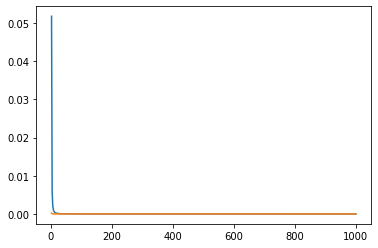

c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in log10


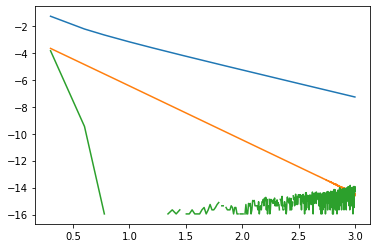

c:\users\hayoo\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:78: RuntimeWarning: divide by zero encountered in log10


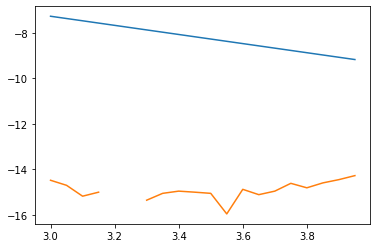

0.6321205499001181


In [102]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy.integrate import fixed_quad

def func(x):
    return np.exp(-x) #function definition  
  
def int_func(x):
    return -np.exp(-x) # analytical integration of above function

def trapezoid(A,B,N, f):
    N = int(N)
    h = (B-A)/(N-1)
    i = np.arange(1,N+1)
    x = A+(i-1)*h 
    
    w = [h] * int(N) 
    w[0] /= 2
    w[-1] /= 2
    
    return sum(f(x)*w)
  
def simpson(A,B,N, f):
    N = int(N + 1 -(N%2))
    h = (B-A)/(N-1)
    i = np.arange(1,N+1)
    x = A+(i-1)*h 
    
    w = [h/3]
    w.extend([4*h/3, 2*h/3] * (int(N/2)))
    w.pop()
    w.append(h/3)
    return sum(f(x)*w)

def Guassian_quadrature(A,B,N,f):
    x=np.array([-0.861136,-0.339981,0.339981,0.861136])
    x = (B+A)/2 + x*(B-A)/2
    w=(B-A)/2 * np.array([0.347855,0.652145,0.652145,0.347855])
    
    return sum(f(x)*w)

print(int_func(1)-int_func(0), int_func(1), int_func(0))
print(trapezoid(0,1,10000, func))
print(simpson(0,1,10000, func))

Ns = np.arange(2,1001,2)
t = [trapezoid(0,1,n, func) for n in Ns]
s = [simpson(0,1,n, func) for n in Ns]
exact = int_func(1)-int_func(0)
Et = abs(t-exact)
Es = abs(s-exact)

gq = [fixed_quad(func, 0, 1,n=int(N))[0] for N in Ns] 
Egq = abs(gq-exact)

fig = plt.figure()
plt.plot(Ns, Et)
plt.plot(Ns, Es)
plt.show()

fig1 = plt.figure()
plt.plot(np.log10(Ns), np.log10(Et))
plt.plot(np.log10(Ns), np.log10(Es))
plt.plot(np.log10(Ns), np.log10(Egq))
plt.show()

Ns = 10**np.arange(3, 4, 0.05)
t = [trapezoid(0,1,n, func) for n in Ns]
s = [simpson(0,1,n, func) for n in Ns]
exact = int_func(1)-int_func(0)
Et = abs(t-exact)
Es = abs(s-exact)


fig2 = plt.figure()
plt.plot(np.log10(Ns), np.log10(Et))
plt.plot(np.log10(Ns), np.log10(Es))
plt.show()

print(Guassian_quadrature(0,1,1000, func))